# Machine Learning: Task 3
_by Mikhail Karasikov_

In [1]:
import numpy as np
import sklearn
import pandas as pd

In [2]:
train_df = pd.read_csv('train.data', na_values="?", sep=',', engine='python', header=None)
test_df = pd.read_csv('test.data', na_values="?", sep=',', engine='python', header=None)
train_labels = train_df[15]
train_df = train_df[np.arange(15)]
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,b,2783,1.540,u,g,w,v,3.750,t,t,5,t,g,0.000010,3
1,b,3317,1.040,u,g,r,h,6.500,t,f,0,t,g,0.000016,31285
2,a,2292,11.585,u,g,cc,v,0.040,t,f,0,f,g,0.000008,1349
3,b,5442,0.500,y,p,k,h,3.960,t,f,0,f,g,0.000018,314
4,b,4250,4.915,y,p,w,v,3.165,t,f,0,t,g,0.000005,1442


In [3]:
train_df.shape

(402, 15)

Dataset contains $402$ training samples and $15$ features as long as the last column corresponds to class labels.

In [4]:
train_df.dtypes

0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13    float64
14      int64
dtype: object

Features 1, 2, 7, and 13 are continuous. The others are categorial.

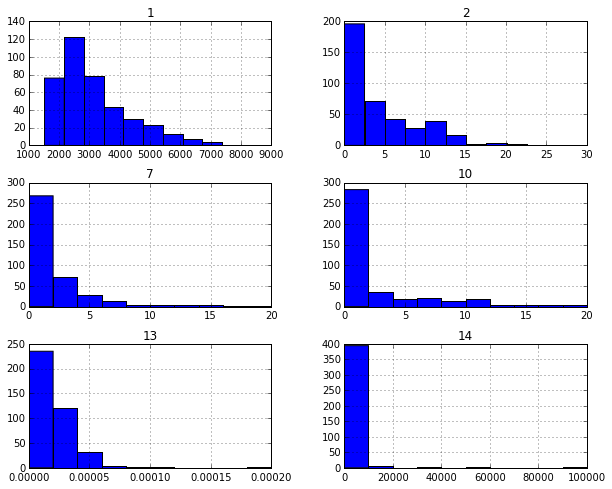

,1,2,7,10,13,14
count,397.000000,402.000000,402.000000,402.000000,395.000000,402.000000
mean,3164.735516,4.540535,2.085323,2.156716,0.000018,1137.875622
std,1195.768564,4.659156,3.143756,3.898055,0.000018,6038.564633
min,1517.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2267.000000,1.000000,0.210000,0.000000,0.000007,0.000000
50%,2825.000000,2.687500,1.000000,0.000000,0.000016,6.000000
75%,3750.000000,7.000000,2.500000,2.000000,0.000028,444.000000
max,8025.000000,25.085000,20.000000,20.000000,0.000200,100000.000000


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

train_df.hist(figsize=(10, 8))
plt.show()
train_df.describe()

Histograms for continuous features are presented above.

Let's look at possible values of features and their distributions.

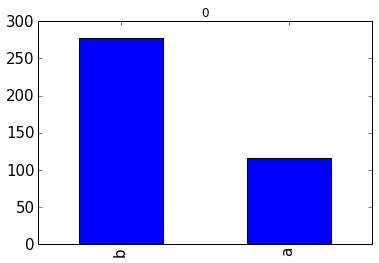

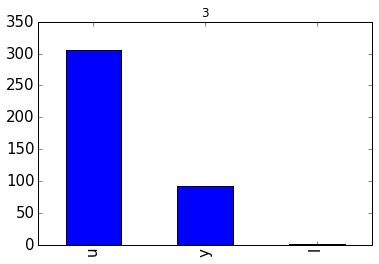

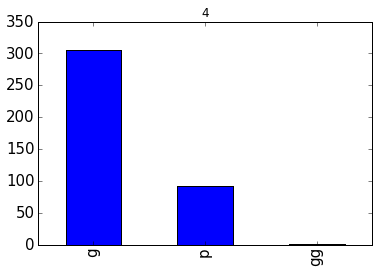

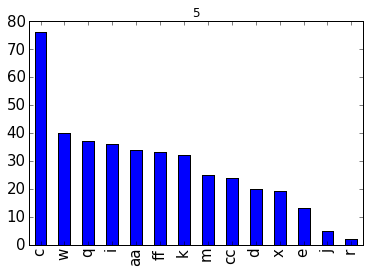

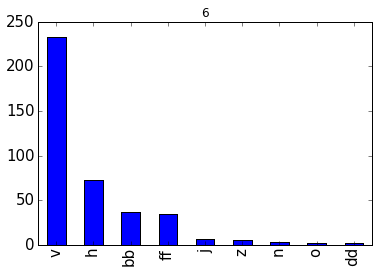

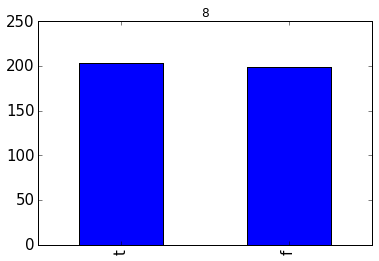

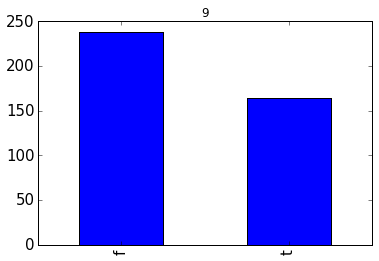

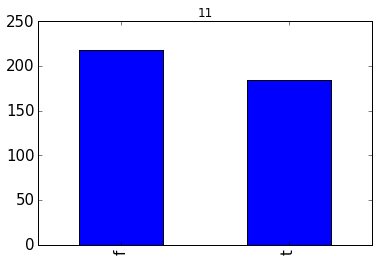

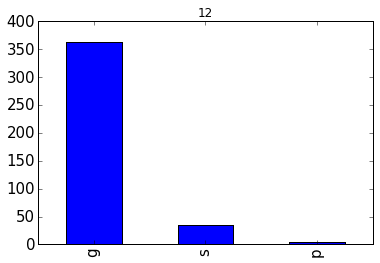

In [6]:
train_df[0].value_counts().plot(kind='bar', title='0', fontsize=15)
plt.show()
train_df[3].value_counts().plot(kind='bar', title='3', fontsize=15)
plt.show()
train_df[4].value_counts().plot(kind='bar', title='4', fontsize=15)
plt.show()
train_df[5].value_counts().plot(kind='bar', title='5', fontsize=15)
plt.show()
train_df[6].value_counts().plot(kind='bar', title='6', fontsize=15)
plt.show()
train_df[8].value_counts().plot(kind='bar', title='8', fontsize=15)
plt.show()
train_df[9].value_counts().plot(kind='bar', title='9', fontsize=15)
plt.show()
train_df[11].value_counts().plot(kind='bar', title='11', fontsize=15)
plt.show()
train_df[12].value_counts().plot(kind='bar', title='12', fontsize=15)
plt.show()

In [7]:
train_df.isnull().sum(0)

0     8
1     5
2     0
3     3
4     3
5     6
6     6
7     0
8     0
9     0
10    0
11    0
12    0
13    7
14    0
dtype: int64

Features 0, 1, 3, 4, 5, 6, and 13 contain missed values. One can see them above.

In [8]:
train_df.isnull().sum(0).sum()

38

Total number of missed values is $38$.

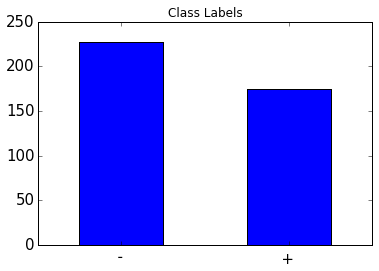

In [9]:
train_labels.value_counts().plot(kind='bar', title='Class Labels', fontsize=15, rot=180)
plt.show()

There are two classes in the problem, which are lebeled by $+$ and $-$.

One can see, they are more or less balanced.

### Filling missing values
Let's filled missed values with standard pandas' procedure.

In [10]:
train_df_filled = train_df.fillna(method='pad')
test_df_filled = test_df.fillna(method='pad')
train_df_filled.isnull().sum(0).sum()

0

### One-Hot Encoding

Let's transform all categorical features with one-hot encoding.

In [11]:
from sklearn import preprocessing

def get_series_ids(x):
    values = np.unique(x)
    values2nums = dict(zip(values, range(len(values))))
    return x.replace(values2nums)

full_df_filled = pd.concat((train_df_filled, test_df_filled))

for f in train_df_filled.select_dtypes([object]).columns:
    full_df_filled[f] = get_series_ids(full_df_filled[f])

encoder = preprocessing.OneHotEncoder(categorical_features=train_df_filled.select_dtypes([object, np.int64]).columns)
full_features = encoder.fit_transform(full_df_filled).todense()

train_features = full_features[:train_df_filled.shape[0]]
test_features = full_features[train_df_filled.shape[0]:]
train_features.shape

(402, 307)

### Decision Tree
Let's apply decision tree classifier.

In [12]:
from sklearn import tree, cross_validation, cross_validation, svm, grid_search

dt_classifier = tree.DecisionTreeClassifier()
scores = cross_validation.cross_val_score(dt_classifier, train_features, train_labels, cv=5)
scores.mean()

0.8085802469135801

In [13]:
dt_classifier = tree.DecisionTreeClassifier(criterion='entropy')
scores = cross_validation.cross_val_score(dt_classifier, train_features, train_labels, cv=5)
scores.mean()

0.80373456790123454

In [14]:
dt_classifier = tree.DecisionTreeClassifier(max_features=40)
scores = cross_validation.cross_val_score(dt_classifier, train_features, train_labels, cv=5)
scores.mean()

0.7588580246913581

Changes of parameters don't lead to increasing of classification quality.

We are going to try grid search.

In [15]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'], 
              'max_features': ['auto', 'sqrt', 'log2', None],
              'max_depth': list(range(20, 1000, 100)),
              'min_samples_leaf': list(range(1, 30, 5))}

clf = grid_search.GridSearchCV(tree.DecisionTreeClassifier(), parameters)
result = %timeit -o clf.fit(train_features, train_labels)

print(clf.best_params_)

time = {}
accuracy = {}
time['DT'] = result.best
accuracy['DT'] = clf.best_score_

print('Time: %.2fs, Mean accuracy: %.2f' % (result.best, clf.best_score_))

1 loops, best of 3: 25.5 s per loop
{'splitter': 'best', 'criterion': 'gini', 'min_samples_leaf': 16, 'max_features': 'sqrt', 'max_depth': 120}
Time: 25.51s, Mean accuracy: 0.86


Now we can see optimal parameters.

### SVM classifier

In [16]:
svm_classifier = svm.SVC()
scores = cross_validation.cross_val_score(svm_classifier, train_features, train_labels, cv=5)
scores.mean()

0.56240740740740736

The quality is very poor. Let's normalize the data.

In [17]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
train_features_normalized = normalizer.fit_transform(train_features)
scores = cross_validation.cross_val_score(svm_classifier, train_features_normalized, train_labels, cv=5)
scores.mean()

0.56466049382716044

The accuracy wasn't increased. Let's tune the parameters.

In [18]:
parameters = {
    'C': np.logspace(-2, 2, 5),
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': np.arange(1, 4),
    'coef0': np.logspace(-4, 0, 3),
    'gamma': np.logspace(-1, 1, 3)
}

clf = grid_search.GridSearchCV(svm.SVC(), parameters)
result = %timeit -o clf.fit(train_features_normalized, train_labels)

print(clf.best_params_, '\n')

time['SVM'] = result.best
accuracy['SVM'] = clf.best_score_

print('Time: %.2fs, Mean accuracy: %.2f' % (result.best, clf.best_score_))

1 loops, best of 3: 1min 20s per loop
{'degree': 3, 'gamma': 10.0, 'C': 100.0, 'coef0': 0.0001, 'kernel': 'poly'} 

Time: 80.69s, Mean accuracy: 0.84


It achieved about $80\%$ accuracy.

### Choosing The Best Classifier

#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

parameters = {
    'C': np.logspace(-2, 5, 8),
    'penalty': ['l1', 'l2'],
    'fit_intercept' : [True, False],
}

clf = grid_search.GridSearchCV(LogisticRegression(), parameters)

result = %timeit -o clf.fit(train_features_normalized, train_labels)

print(clf.best_params_, '\n')

time['LR'] = result.best
accuracy['LR'] = clf.best_score_

print('Time: %.2fs, Mean accuracy: %.2f' % (result.best, clf.best_score_))

1 loops, best of 3: 1.55 s per loop
{'penalty': 'l1', 'C': 1000.0, 'fit_intercept': True} 

Time: 1.55s, Mean accuracy: 0.84


#### KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'n_neighbors': np.arange(1, 10, 1),
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [10, 30, 50]
}

clf = grid_search.GridSearchCV(KNeighborsClassifier(), parameters)

result = %timeit -o clf.fit(train_features_normalized, train_labels)

print(clf.best_params_, '\n')

time['KNN'] = result.best
accuracy['KNN'] = clf.best_score_

print('Time: %.2fs, Mean accuracy: %.2f' % (result.best, clf.best_score_))

1 loops, best of 3: 8.3 s per loop
{'leaf_size': 10, 'n_neighbors': 8, 'algorithm': 'auto'} 

Time: 8.30s, Mean accuracy: 0.80
